In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising-sales.csv')
print(df)

        tv  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [3]:
X=df[['tv','radio','newspaper']]
y=df['sales']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 ,random_state=100)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print("Intercept : ",regressor.intercept_)
print("Coefficients : ")
print(list(zip(X,regressor.coef_)))

Intercept :  2.652789668879496
Coefficients : 
[('tv', 0.04542559602399794), ('radio', 0.18975772766893614), ('newspaper', 0.00460307895311209)]


In [14]:
y_pred_mlr= regressor.predict(X_test)
print("Prediction for test set : {}".format(y_pred_mlr))

Prediction for test set : [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [15]:
mlr_diff = pd.DataFrame({"Actual Values":y_test, "Predicted Values":y_pred_mlr})
print(mlr_diff)

     Actual Values  Predicted Values
126            6.6         10.621601
104           20.7         20.006253
99            17.2         16.918509
92            19.4         19.170407
111           21.8         20.949741
167           12.2         13.122843
116           12.2         11.807407
96            11.7         12.320198
52            22.6         20.578068
69            22.3         20.956627
164           11.9         10.790965
124           19.7         19.548687
182            8.7          6.424039
154           15.6         15.231334
125           10.6          8.972263
196            9.7          7.898979
194           17.3         16.235995
177           11.7         12.026365
163           18.0         17.097022
31            11.9         11.260803
11            17.4         16.978263
73            11.0          9.756557
15            22.4         20.823898
41            17.1         17.209167
97            15.5         15.138162
128           24.7         21.972907
1

In [16]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test,y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test,y_pred_mlr)
rootMeanSqErr=np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mlr))
print('R squared : {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error : ',meanAbErr)
print('Mean Squared Error : ',meanSqErr)
print('Root Mean Square Error',rootMeanSqErr)

R squared : 89.59
Mean Absolute Error :  1.0638483124072031
Mean Squared Error :  1.8506819941636967
Root Mean Square Error 1.0314302266305768


In [17]:
print(y_test[1] , y_pred_mlr[1])

10.4 20.006253019291808


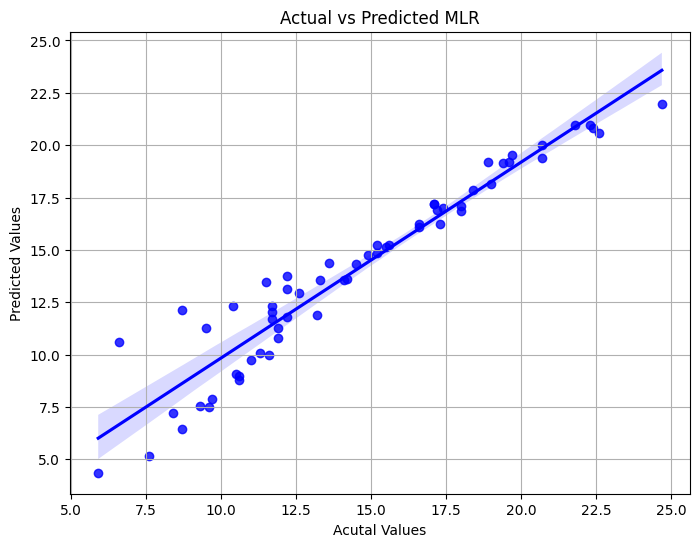

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y= y_pred_mlr, color='blue')
plt.xlabel("Acutal Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted MLR")
plt.grid(True)
plt.show()

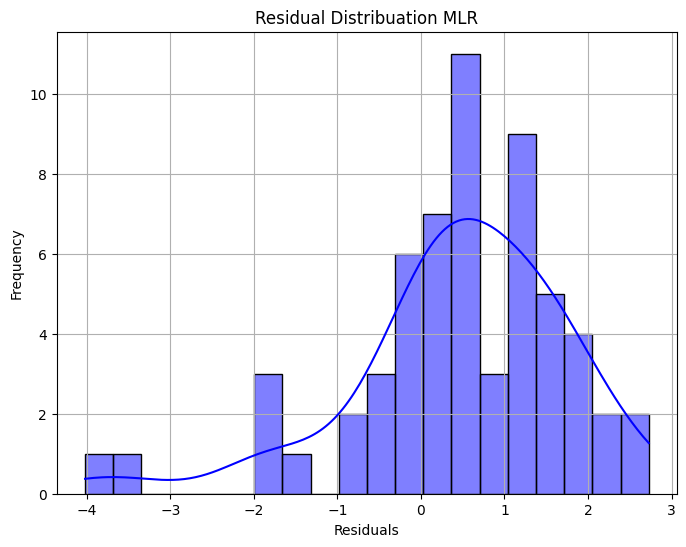

In [19]:
residual = y_test - y_pred_mlr
plt.figure(figsize=(8, 6))
sns.histplot(residual, bins=20, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribuation MLR")
plt.grid(True)
plt.show()